<a href="https://colab.research.google.com/github/RichaP23/Stock-Price-Prediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
#load data
data=pd.read_csv("Nifty50.csv")
#show data
data

,Date,Price,Open,High,Low,Vol.,Change %
0,29-11-2024,"24,117.35","23,951.30","24,127.65","23,948.60",72.91M,0.85%
1,28-11-2024,"23,914.15","24,274.15","24,345.75","23,873.35",366.75M,-1.49%
2,27-11-2024,"24,274.90","24,204.80","24,354.55","24,145.65",295.01M,0.33%
3,26-11-2024,"24,194.50","24,343.30","24,343.30","24,125.40",230.69M,-0.11%
4,25-11-2024,"24,221.90","24,253.55","24,351.55","24,135.45",687.17M,1.32%
...,...,...,...,...,...,...,...
4958,03-12-2004,"1,996.20","1,991.90","2,011.90","1,990.30",111.13M,-0.14%
4959,02-12-2004,"1,999.00","1,962.75","2,001.55","1,962.75",131.75M,1.88%
4960,01-12-2004,"1,962.05","1,960.75","1,971.60","1,944.50",114.58M,0.17%
4961,30-11-2004,"1,958.80","1,940.25","1,963.80","1,940.25",119.05M,0.99%


Visual Representation of Data

In [ ]:


import pandas as pd
import plotly.express as px

# Convert relevant columns to numeric, handling commas and 'M' in 'Vol.'
# Note: This assumes 'Vol.' is always in millions
data['Price'] = pd.to_numeric(data['Price'].str.replace(',', ''), errors='coerce')
data['Open'] = pd.to_numeric(data['Open'].str.replace(',', ''), errors='coerce')
data['High'] = pd.to_numeric(data['High'].str.replace(',', ''), errors='coerce')
data['Low'] = pd.to_numeric(data['Low'].str.replace(',', ''), errors='coerce')
data['Vol.'] = pd.to_numeric(data['Vol.'].str.replace('M', '').str.replace(',', ''), errors='coerce') * 1000000


# Create an interactive line plot of the price over time using Plotly
fig = px.line(data, x='Date', y='Price', title='Stock Price Over Time')
fig.show()

# Create an interactive scatter plot showing the relationship between volume and price
fig = px.scatter(data, x='Vol.', y='Price', title='Volume vs. Price')
fig.show()

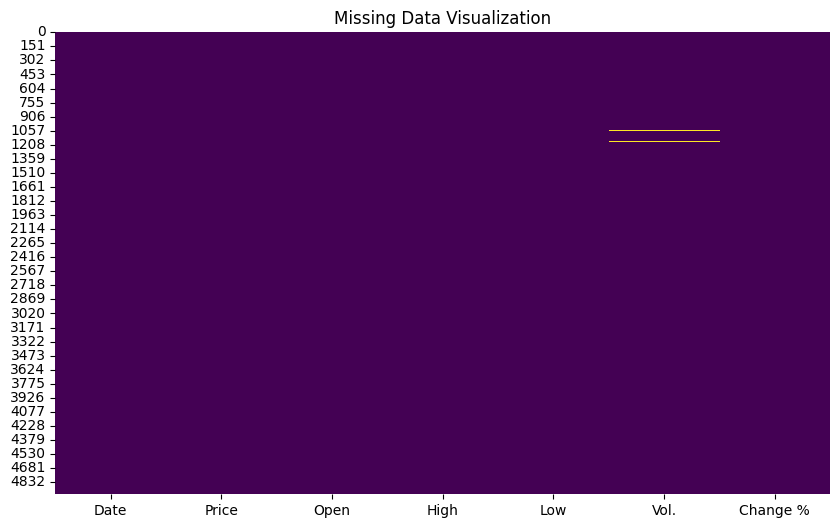

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check for missing values
if data.isnull().sum().any():
    # If missing values exist, visualize them
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Visualization')
    plt.show()
else:
    # If no missing values, display data summary
    print(data.info())

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



# 1. Handle Missing Values:
data.dropna(inplace=True)

# 2. Feature Engineering:
data['Price_Change'] = data['Price'] - data['Price'].shift(1)

# 3. Feature Scaling:
# Scaling features to a similar range can improve model performance.
# Here's an example using MinMaxScaler:
scaler = MinMaxScaler()
numerical_features = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Price_Change']  # Select numerical features to scale
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 4. Split Data into Training and Testing Sets:
# Split your data to train and evaluate your model.
X = data[['Open', 'High', 'Low', 'Vol.', 'Price_Change']]  # Select features for prediction
y = data['Price']  # Select target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

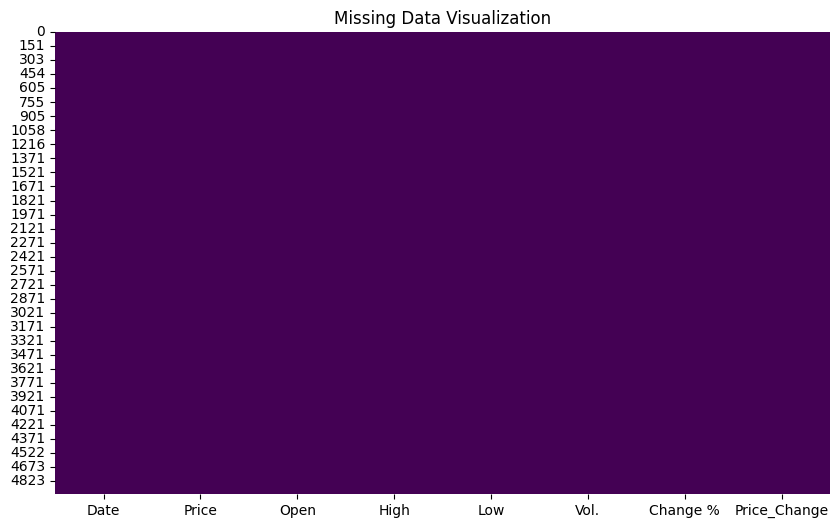

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check for missing values
if data.isnull().sum().any():
    # If missing values exist, visualize them
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Visualization')
    plt.show()
else:
    # If no missing values, display data summary
    print(data.info())

In [ ]:
from sklearn.metrics import mean_squared_error
# 1. Create an XGBoost Regressor object:
model = xgb.XGBRegressor(objective='reg:squarederror',
                          n_estimators=100,
                          learning_rate=0.1,
                          max_depth=3)

# 2. Train the model:
model.fit(X_train, y_train)

# 3. Make Predictions:
y_pred = model.predict(X_test)

# 4. Evaluate the Model:
# Calculate the Mean Squared Error (MSE) to assess the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.4087458683128725e-05


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score: -1.202680261625154e-05


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=1  # Add this for progress updates
                          )

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Best Model): {mse}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score: -1.202680261625154e-05
Mean Squared Error (Best Model): 1.1923500260316644e-05


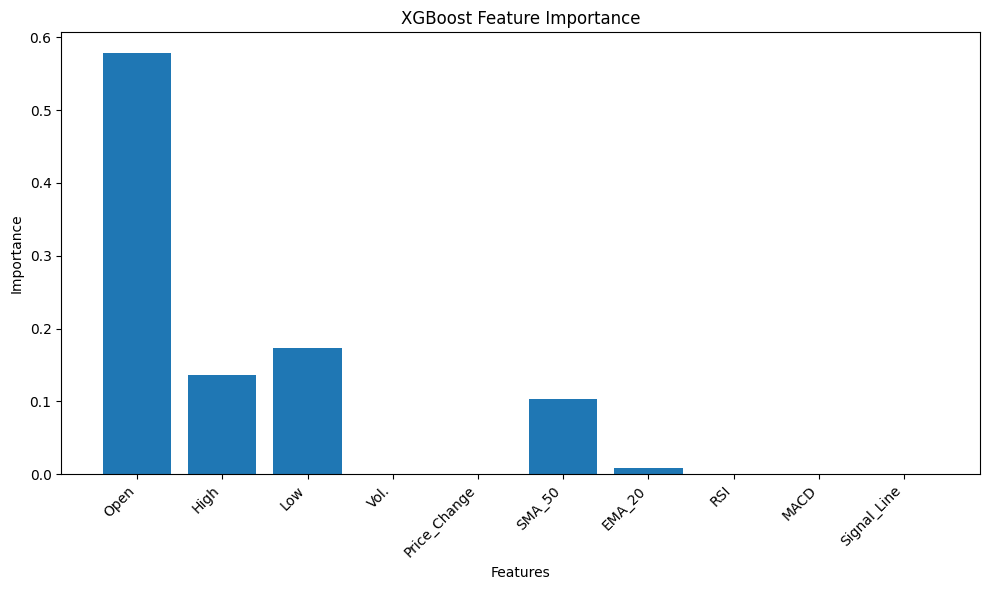

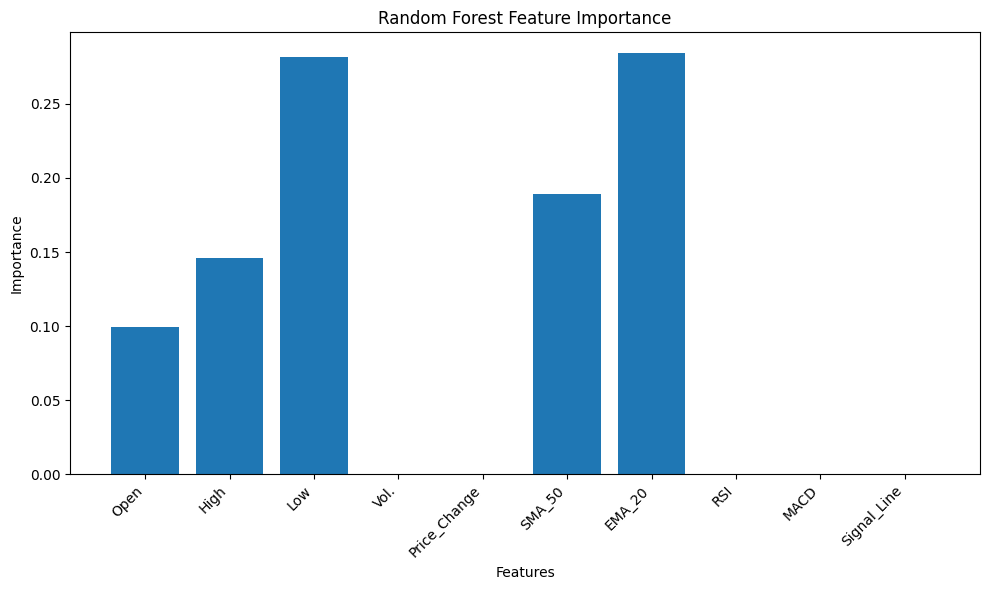

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

importance = model.feature_importances_
feature_names = X_train.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming 'rf_model' is your trained Random Forest model
importance = rf_model.feature_importances_
feature_names = X_train.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()



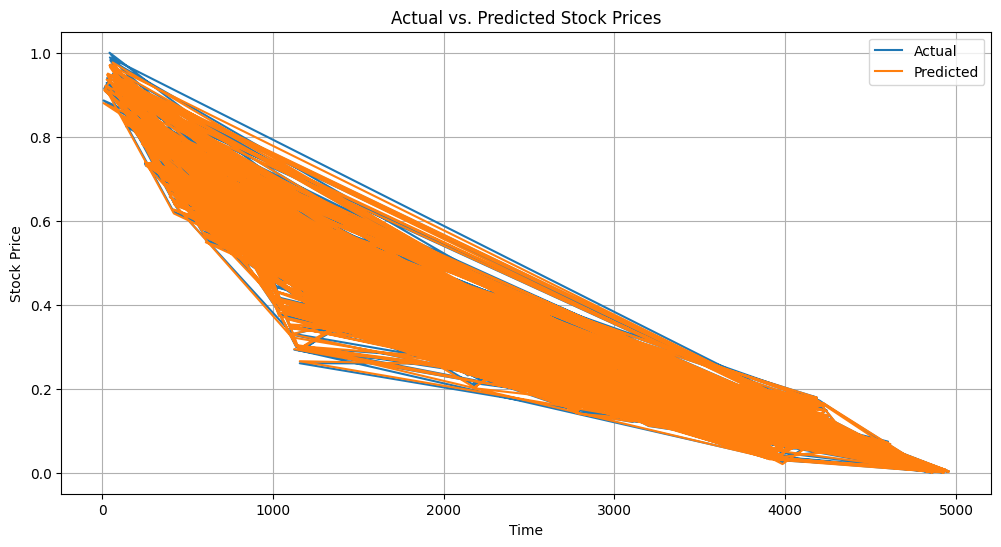

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted prices
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the actual and predicted prices over time
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

Mean Squared Error (Random Forest): 4.256176874785336e-06


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape the input data for LSTM (samples, timesteps, features)
X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32)  # Adjust epochs and batch_size

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Check for NaN in predictions and replace with 0 if found
y_pred_lstm = np.nan_to_num(y_pred_lstm)

# Evaluate the model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f"Mean Squared Error (LSTM): {mse_lstm}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan
Epoch 9/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan
Epoch 10/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 11/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan
Epoch 12/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 13/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan
Epoch 14/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: nan
Epoch 15/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: nan
Epoch 16/100
124/124 ━━━━━━━━━━

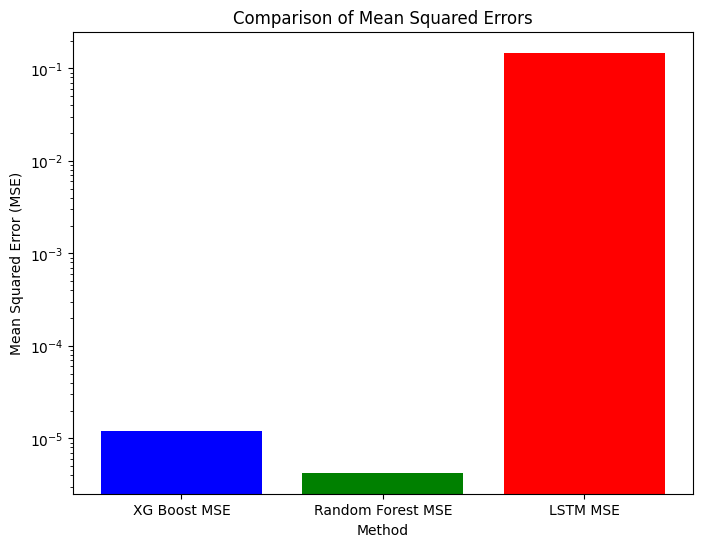

In [ ]:

# Create a dictionary to store the MSE values
mse_values = [mse,mse_rf,mse_lstm]

labels = ['XG Boost MSE', 'Random Forest MSE','LSTM MSE']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, mse_values, color=['blue', 'green','red'])
plt.xlabel('Method')
plt.ylabel('Mean Squared Error (MSE)')
title = 'Comparison of Mean Squared Errors'
plt.title(title)
plt.yscale('log')  # Use log scale for better visualization of small values

# Display the chart
plt.show()

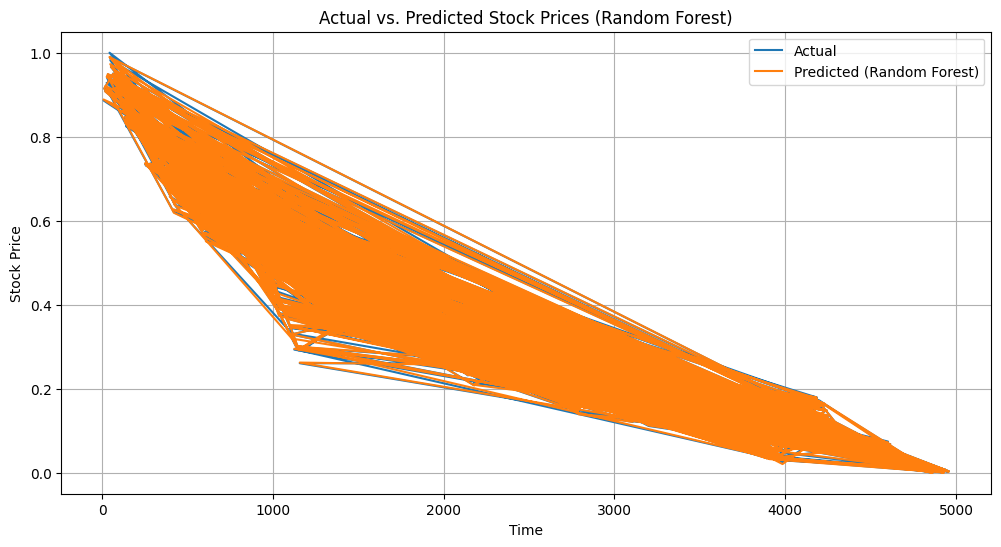

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred_rf, label='Predicted (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

data['SMA_50'] = data['Price'].rolling(window=50).mean()  # 50-day SMA
data['EMA_20'] = data['Price'].ewm(span=20, adjust=False).mean()  # 20-day EMA

In [ ]:
import numpy as np

# Calculate price differences
delta = data['Price'].diff()

# Separate gains and losses
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Calculate average gains and losses
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

# Calculate RSI
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

In [ ]:
# Calculate short-term and long-term EMAs
ema_12 = data['Price'].ewm(span=12, adjust=False).mean()
ema_26 = data['Price'].ewm(span=26, adjust=False).mean()

# Calculate MACD
data['MACD'] = ema_12 - ema_26

# Calculate signal line (9-day EMA of MACD)
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Price_Change,SMA_50,EMA_20,RSI,MACD,Signal_Line
0,29-11-2024,0.913682,0.905665,0.911723,0.909189,0.070501,0.85%,NaN,NaN,0.913682,NaN,0.000000,0.000000
1,28-11-2024,0.905324,0.918925,0.920679,0.906087,0.365853,-1.49%,0.234724,NaN,0.912886,NaN,-0.000667,-0.000133
2,27-11-2024,0.920162,0.916076,0.921041,0.917313,0.293744,0.33%,0.425958,NaN,0.913579,NaN,0.000002,-0.000106
3,26-11-2024,0.916855,0.921765,0.920579,0.916478,0.229093,-0.11%,0.276365,NaN,0.913891,NaN,0.000262,-0.000033
4,25-11-2024,0.917982,0.918079,0.920917,0.916892,0.687922,1.32%,0.312920,NaN,0.914281,NaN,0.000553,0.000085


In [ ]:

X = data[['Open', 'High', 'Low', 'Vol.', 'Price_Change','SMA_50','EMA_20','RSI','MACD','Signal_Line']]  # Select features for prediction
y = data['Price']  # Select target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Retrain the Random Forest model
rf_model.fit(X_train, y_train)

# Re-evaluate performance (e.g., calculate MSE)
y_pred_rf = rf_model.predict(X_test)
mse_rf_new = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest with Feature Engineering): {mse_rf}")

Mean Squared Error (Random Forest with Feature Engineering): 4.256176874785336e-06


In [ ]:
print(f"Original MSE (Random Forest): {mse_rf}")
print(f"New MSE (Random Forest with Feature Engineering): {mse_rf_new}")

# Calculate the percentage change in MSE
percentage_change = ((mse_rf_new - mse_rf) / mse_rf) * 100
print(f"Percentage Change in MSE: {percentage_change:.2f}%")

Original MSE (Random Forest): 4.256176874785336e-06
New MSE (Random Forest with Feature Engineering): 4.5235304252910106e-06
Percentage Change in MSE: 6.28%


In [ ]:

# 1. Create an XGBoost Regressor object:
model = xgb.XGBRegressor(objective='reg:squarederror',  # Specify the objective for regression
                          n_estimators=100,  # Number of boosting rounds (trees)
                          learning_rate=0.1,  # Step size shrinkage used in update to prevents overfitting
                          max_depth=3)  # Maximum depth of a tree

# 2. Train the model:
model.fit(X_train, y_train)

# 3. Make Predictions:
y_pred = model.predict(X_test)

# 4. Evaluate the Model:
# Calculate the Mean Squared Error (MSE) to assess the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape the input data for LSTM (samples, timesteps, features)
X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32)  # Adjust epochs and batch_size

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Check for NaN in predictions and replace with 0 if found
y_pred_lstm = np.nan_to_num(y_pred_lstm)

# Evaluate the model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f"Mean Squared Error (LSTM): {mse_lstm}")

Mean Squared Error: 1.0229645922494055e-05
Mean Squared Error (Random Forest): 4.5235304252910106e-06
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 9/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan
Epoch 10/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 11/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 12/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 13/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan
Epoch 14/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: nan
Epoch 15/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: nan
Epoch 16/100
124/124 ━━━━━━━━━━

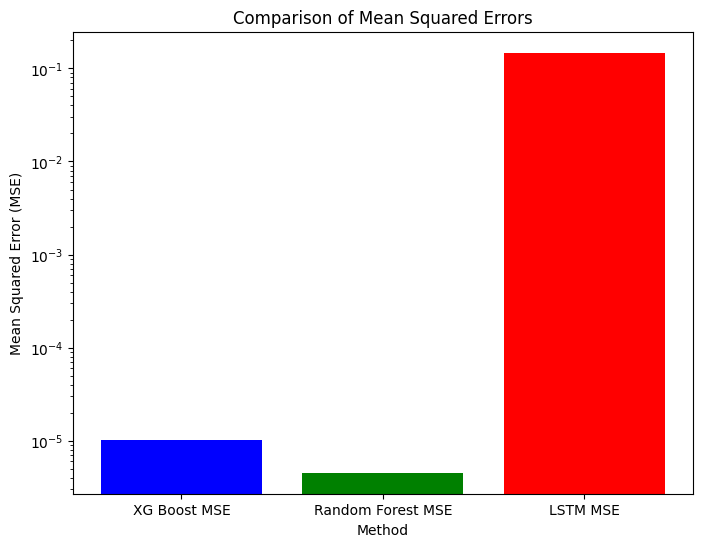

In [ ]:
import matplotlib.pyplot as plt

# Define the MSE values
mse = [1.0229645922494055e-05, 4.5235304252910106e-06,0.1475596404070161]

# Define labels for the bars
labels = ['XG Boost MSE', 'Random Forest MSE','LSTM MSE']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, mse, color=['blue', 'green','red'])
plt.xlabel('Method')
plt.ylabel('Mean Squared Error (MSE)')
title = 'Comparison of Mean Squared Errors'
plt.title(title)
plt.yscale('log')  # Use log scale for better visualization of small values

# Display the chart
plt.show()

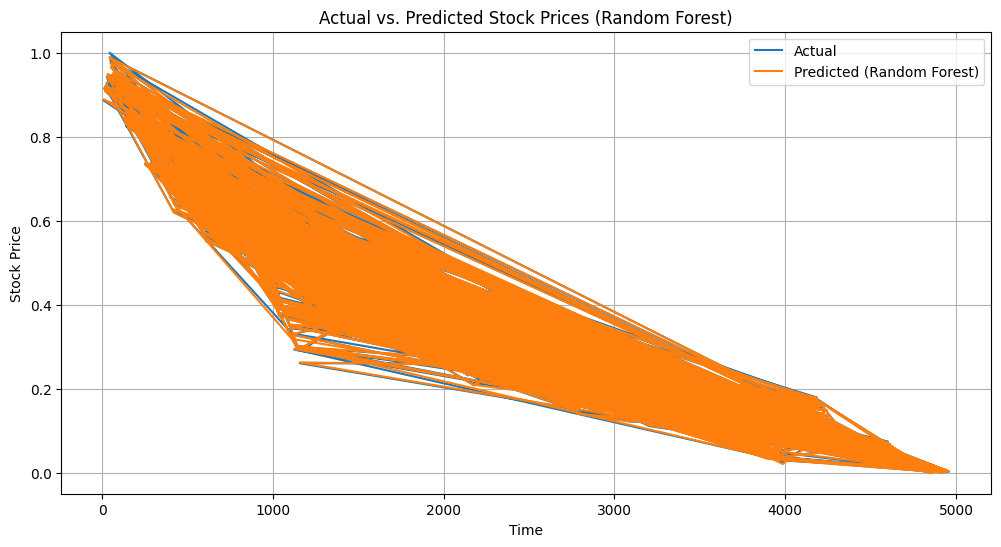

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred_rf, label='Predicted (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()